This notebook trains a machine learning capable of detecting DeepFake (spoofed) voice samples and
distinguishing them from real human speech.

Based on LA – (Logical Access) type audio set given in ASVspoof 2019 Dataset.

Logical Access attacks occur when fake speech is directly fed into the system digitally, without using a microphone or speaker. i.e. Clean, artificial signals, like No room noise and No microphone distortion.

In [49]:
import pandas as pd
import numpy as np
import os
import librosa

## Dataset selection & protocol analysis.

In [50]:
# organizing audio samples into training sets.
# creating a dataframe named training_protocols.

training_protocols_path = "/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt"

training_protocols = pd.read_csv(training_protocols_path, sep=" ", header=None)
training_protocols.columns = ["speaker", "file_id", "attack", "channel", "label"]
training_protocols["split"] = "train"

# Adding paths of Audio files to dataframe according to their file_id s.

AUDIO_BASE = "/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVspoof2019_LA_train/flac/"

training_protocols["audio_path"] = training_protocols["file_id"].apply(
    lambda x: f"{AUDIO_BASE}{x}.flac"
)

In [51]:
# Verifying audio paths exist.
training_protocols["file_exists"] = training_protocols["audio_path"].apply(
    lambda x: os.path.exists(x)
)
training_protocols["file_exists"].value_counts()

file_exists
True    25380
Name: count, dtype: int64

In [52]:
training_protocols.describe(include="all")

,speaker,file_id,attack,channel,label,split,audio_path,file_exists
count,25380,25380,25380,25380,25380,25380,25380,25380
unique,20,25380,1,7,2,1,25380,1
top,LA_0082,LA_T_9982036,-,A01,spoof,train,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,True
freq,1308,1,25380,3800,22800,25380,1,25380


In [53]:
training_protocols["label"].value_counts()

label
spoof       22800
bonafide     2580
Name: count, dtype: int64

In [54]:
training_protocols[["audio_path", "label", "split"]].head()

,audio_path,label,split
0,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,train
1,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,train
2,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,train
3,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,train
4,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,train


In [55]:
# organizing audio samples into validation sets.
# creating a dataframe named development_protocols.

development_protocols_path = "/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.dev.trl.txt"

development_protocols = pd.read_csv(development_protocols_path, sep=" ", header=None)
development_protocols.columns = ["speaker", "file_id", "attack", "channel", "label"]
development_protocols["split"] = "development"

# Adding paths of Audio files to dataframe according to their file_id s.

AUDIO_BASE = "/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVspoof2019_LA_dev/flac/"

development_protocols["audio_path"] = development_protocols["file_id"].apply(
    lambda x: f"{AUDIO_BASE}{x}.flac"
)

In [56]:
# Verifying audio paths exist.
development_protocols["file_exists"] = development_protocols["audio_path"].apply(
    lambda x: os.path.exists(x)
)
development_protocols["file_exists"].value_counts()

file_exists
True    24844
Name: count, dtype: int64

In [57]:
development_protocols.describe(include="all")

,speaker,file_id,attack,channel,label,split,audio_path,file_exists
count,24844,24844,24844,24844,24844,24844,24844,24844
unique,20,24844,1,7,2,1,24844,1
top,LA_0069,LA_D_9967770,-,A01,spoof,development,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,True
freq,2638,1,24844,3716,22296,24844,1,24844


In [58]:
development_protocols["label"].value_counts()

label
spoof       22296
bonafide     2548
Name: count, dtype: int64

In [59]:
development_protocols[["audio_path", "label", "split"]].head()

,audio_path,label,split
0,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,development
1,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,development
2,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,development
3,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,development
4,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,development


In [60]:
# organizing audio samples into testing sets.
# creating a dataframe named testing_protocols.

testing_protocols_path = "/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt"

testing_protocols = pd.read_csv(testing_protocols_path, sep=" ", header=None)
testing_protocols.columns = ["speaker", "file_id", "attack", "channel", "label"]
testing_protocols["split"] = "test"

# Adding paths of Audio files to dataframe according to their file_id s.

AUDIO_BASE = "/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVspoof2019_LA_eval/flac/"

testing_protocols["audio_path"] = testing_protocols["file_id"].apply(
    lambda x: f"{AUDIO_BASE}{x}.flac"
)

In [61]:
# Verifying audio paths exist.
testing_protocols["file_exists"] = testing_protocols["audio_path"].apply(
    lambda x: os.path.exists(x)
)
testing_protocols["file_exists"].value_counts()

file_exists
True    71237
Name: count, dtype: int64

In [62]:
testing_protocols.describe(include="all")

,speaker,file_id,attack,channel,label,split,audio_path,file_exists
count,71237,71237,71237,71237,71237,71237,71237,71237
unique,67,71237,1,14,2,1,71237,1
top,LA_0039,LA_E_4689563,-,-,spoof,test,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,True
freq,1784,1,71237,7355,63882,71237,1,71237


In [63]:
testing_protocols["label"].value_counts()

label
spoof       63882
bonafide     7355
Name: count, dtype: int64

In [64]:
testing_protocols[["audio_path", "label", "split"]].head()

,audio_path,label,split
0,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,spoof,test
1,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,spoof,test
2,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,spoof,test
3,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,spoof,test
4,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,spoof,test


In [65]:
label_map = {"bonafide": 0, "spoof": 1}
training_protocols["label_enc"] = training_protocols["label"].map(label_map)
development_protocols["label_enc"] = development_protocols["label"].map(label_map)
testing_protocols["label_enc"] = testing_protocols["label"].map(label_map)

In [66]:
training_protocols[["audio_path", "label", "split", "label_enc"]].head()

,audio_path,label,split,label_enc
0,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,train,0
1,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,train,0
2,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,train,0
3,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,train,0
4,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,train,0


In [67]:
development_protocols[["audio_path", "label", "split", "label_enc"]].head()

,audio_path,label,split,label_enc
0,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,development,0
1,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,development,0
2,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,development,0
3,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,development,0
4,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,bonafide,development,0


In [68]:
testing_protocols[["audio_path", "label", "split", "label_enc"]].head()

,audio_path,label,split,label_enc
0,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,spoof,test,1
1,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,spoof,test,1
2,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,spoof,test,1
3,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,spoof,test,1
4,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,spoof,test,1


## Pipeline for Feature Extraction

In [69]:
# 1. Audio preprocessing pipeline.

def audio_preprocessing_pipeline(audio_path, target_sr=22050, target_duration=4.0):
                                     
    target_length = int(target_sr * target_duration)
    
    # Loading & resampling.
    audio, _ = librosa.load(audio_path, sr=target_sr)
    
    # Normalizing.
    audio = librosa.util.normalize(audio)
    
    # Trimming silence.
    audio, _ = librosa.effects.trim(audio)
    
    # Padding or cropping(if any).
    if len(audio) < target_length:
        audio = np.pad(audio, (0, target_length - len(audio)))
    else:
        audio = audio[:target_length]
    
    return audio

# 2. Feature extraction pipeline to generate MFCC feature vectors.

def extract_mfcc_features(
    audio,
    sr=22050,
    n_mfcc=13
):    
    """
    Function Parameters:
        - audio:(output of preprocessing pipeline)
        - sr: sample rate (default 16kHz)
        - n_mfcc: number of MFCC coefficients
    """
    # Extracting MFCCs.
    mfccs = librosa.feature.mfcc(y=audio, n_mfcc=n_mfcc, sr=sr)
    
    # Extracting first / second MFCCs drivatives.
    delta_mfccs = librosa.feature.delta(mfccs)
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
    #print(mfccs.shape)
    #print(delta_mfccs.shape)
    #print(delta2_mfccs.shape)
    
    mfccs_features_combined = np.vstack([mfccs, delta_mfccs, delta2_mfccs])
    #print(mfccs_features_combined.shape)
    
    # Right now mfccs_features_combined.shape is (39, T), that's a 2d array having time as also a variable,
    # but classical ML models wants fixed lenght vectors or we as 1d arrays example: (78,).
    # For this we will take mean and standard deviation of mfccs_features_combined over duration of audio file (4 secs),
    # and pool them together into one vector of shape (78,) that we can feed into our model.
    
    mfcc_mean = np.mean(mfccs_features_combined, axis=1)
    mfcc_std = np.std(mfccs_features_combined, axis=1)
    
    # Hence MFCC feature vector is created.
    feature_vector = np.concatenate([mfcc_mean, mfcc_std])
    #print(feature_vector.shape)
    
    return feature_vector

## Pipeline for Feature Creation

In [70]:
def full_audio_processing(
    audio_path,
    target_sr=22050,
    target_duration=4.0,
    n_mfcc=13
):
    # Audio preprocessing.
    audio = audio_preprocessing_pipeline(
        audio_path=audio_path,
        target_sr=target_sr,
        target_duration=target_duration
    )

    # MFCC + Delta + Delta-Delta features extraction.
    feature_vector = extract_mfcc_features(
        audio=audio,
        sr=target_sr,
        n_mfcc=n_mfcc
    )

    return feature_vector

## Arranging Target and Predictors

In [71]:
def build_predictors_and_target_arrays(df):
    X = []
    y = []

    for _, row in df.iterrows():
        audio_path = row["audio_path"]
        label = row["label_enc"]

        features = full_audio_processing(audio_path)

        X.append(features)
        y.append(label)

    return np.array(X), np.array(y,)

In [72]:
x_train, y_train = build_predictors_and_target_arrays(training_protocols)
x_dev, y_dev     = build_predictors_and_target_arrays(development_protocols)
x_test, y_test   = build_predictors_and_target_arrays(testing_protocols)

## Scaling Data

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_dev_scaled  = scaler.transform(x_dev)
x_test_scaled = scaler.transform(x_test)

In [74]:
print(x_train.shape, y_train.shape)
print(x_dev.shape, y_dev.shape)
print(x_test.shape, y_test.shape)

(25380, 78) (25380,)
(24844, 78) (24844,)
(71237, 78) (71237,)


## Classifier Using Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000, class_weight="balanced",)

lr_model.fit(x_train_scaled, y_train)
# Model has been trained.

LogisticRegression(class_weight='balanced', max_iter=1000)

In [76]:
# evaluating LR model on Development Dataset.
lr_y_dev_predictions = lr_model.predict(x_dev_scaled)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print("Dev Accuracy Score:")
print(accuracy_score(y_dev, lr_y_dev_predictions))

print("Dev Classification Report:")
print(classification_report(y_dev, lr_y_dev_predictions))

print("Dev Confusion Matrix:")
print(confusion_matrix(y_dev, lr_y_dev_predictions))

Dev Accuracy Score:
0.8596844308484946
Dev Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.79      0.54      2548
           1       0.97      0.87      0.92     22296

    accuracy                           0.86     24844
   macro avg       0.69      0.83      0.73     24844
weighted avg       0.92      0.86      0.88     24844

Dev Confusion Matrix:
[[ 2025   523]
 [ 2963 19333]]


In [77]:
lr_y_dev_probability = lr_model.predict_proba(x_dev_scaled)[:, 1]

from sklearn.metrics import roc_curve
import numpy as np

lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_dev, lr_y_dev_probability)
lr_fnr = 1 - lr_tpr

lr_eer_idx = np.nanargmin(np.abs(lr_fnr - lr_fpr))
lr_eer = lr_fpr[lr_eer_idx]
lr_eer_threshold = lr_thresholds[lr_eer_idx]

print("Dev EER:", lr_eer)
print("EER Threshold:", lr_eer_threshold)

Dev EER: 0.16679748822605966
EER Threshold: 0.5972636412502978


## Classifier Using Support Vector Machine

In [78]:
from sklearn.svm import SVC
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale",class_weight="balanced",  probability=True)

svm_model.fit(x_train_scaled, y_train)
# Model has been trained.

SVC(class_weight='balanced', probability=True)

In [79]:
# evaluating SVM model on Development Dataset.
svm_y_dev_predictions = svm_model.predict(x_dev_scaled)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print("Dev Accuracy Score:")
print(accuracy_score(y_dev, svm_y_dev_predictions))

print("Dev Classification Report:")
print(classification_report(y_dev, svm_y_dev_predictions))

print("Dev Confusion Matrix:")
print(confusion_matrix(y_dev, svm_y_dev_predictions))

Dev Accuracy Score:
0.9564079858315891
Dev Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      2548
           1       0.97      0.98      0.98     22296

    accuracy                           0.96     24844
   macro avg       0.89      0.87      0.88     24844
weighted avg       0.96      0.96      0.96     24844

Dev Confusion Matrix:
[[ 1919   629]
 [  454 21842]]


In [80]:
svm_scores = svm_model.decision_function(x_dev_scaled)

from sklearn.metrics import roc_curve
import numpy as np

svm_fpr, svm_tpr, svm_thresholds = roc_curve( y_dev, svm_scores, pos_label=1)

svm_fnr = 1 - svm_tpr

svm_eer_idx = np.nanargmin(np.abs(svm_fnr - svm_fpr))
svm_eer = svm_fpr[svm_eer_idx]
svm_eer_threshold = svm_thresholds[svm_eer_idx]

print("Dev EER:", svm_eer)
print("EER Threshold:", svm_eer_threshold)

Dev EER: 0.08320251177394035
EER Threshold: 0.7200207858648424


## Classifier Using Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=2, min_samples_leaf=1, class_weight="balanced",random_state=42)

rf_model.fit(x_train_scaled, y_train)
# Model has been trained.

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [82]:
# evaluating RF model on Development Dataset.
rf_y_dev_predictions = rf_model.predict(x_dev_scaled)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("RF Dev Accuracy:")
print(accuracy_score(y_dev, rf_y_dev_predictions))

print("RF Dev Classification Report:")
print(classification_report(y_dev, rf_y_dev_predictions))

print("RF Dev Confusion Matrix:")
print(confusion_matrix(y_dev, rf_y_dev_predictions))

RF Dev Accuracy:
0.9252133311866044
RF Dev Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.29      0.44      2548
           1       0.92      1.00      0.96     22296

    accuracy                           0.93     24844
   macro avg       0.93      0.64      0.70     24844
weighted avg       0.93      0.93      0.91     24844

RF Dev Confusion Matrix:
[[  737  1811]
 [   47 22249]]


In [83]:
rf_y_dev_probability = rf_model.predict_proba(x_dev_scaled)[:, 1]

from sklearn.metrics import roc_curve
import numpy as np

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_dev, rf_y_dev_probability)
rf_fnr = 1 - rf_tpr

rf_eer_idx = np.nanargmin(np.abs(rf_fnr - rf_fpr))
rf_eer = rf_fpr[rf_eer_idx]
rf_eer_threshold = rf_thresholds[rf_eer_idx]

print("RF Dev EER:", rf_eer)
print("RF EER Threshold:", rf_eer_threshold)

RF Dev EER: 0.08320251177394035
RF EER Threshold: 0.8966666666666666


## Comparing different classifier based on ROC Curves on Development Set

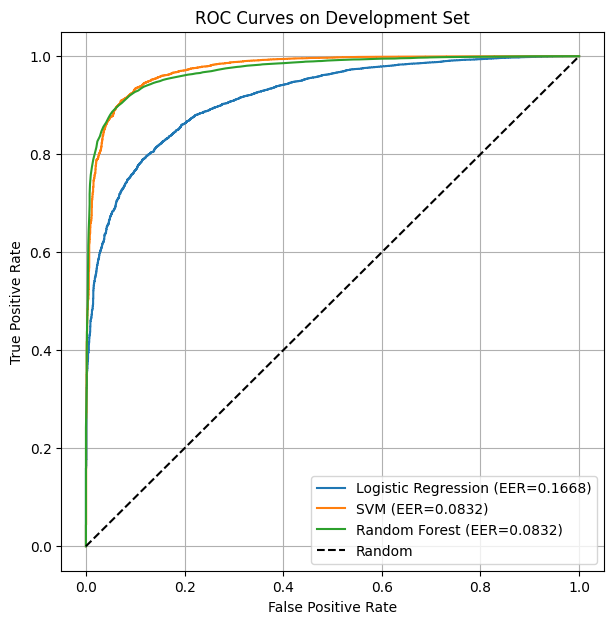

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))

plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (EER={lr_eer:.4f})")
plt.plot(svm_fpr, svm_tpr, label=f"SVM (EER={svm_eer:.4f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (EER={rf_eer:.4f})")

# Random baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves on Development Set")
plt.legend()
plt.grid(True)
plt.show()

## FInal Results and Model Finalising.

Performance was evaluated using:
* Accuracy
* Precision, Recall, F1-score
* Confusion Matrix
* Receiver Operating Characteristic (ROC) curve
* Equal Error Rate (EER)

Note: “Due to class imbalance, accuracy alone is insufficient; therefore, EER and class-wise recall are emphasized.”

| Model               | Accuracy    | EER        | Strengths              | Weaknesses                  |
| ------------------- | ----------- | ---------- | ---------------------- | --------------------------- |
| Logistic Regression | Medium      | High       | Simple, fast           | Poor non-linearity handling |
| Random Forest       | High        | Medium     | Strong spoof detection | Bias toward majority class  |
| **SVM**             | **Highest** | **Lowest** | Best generalization    | Higher computational cost   |


Final Model Selection is Based on:
* Highest accuracy
* Best ROC curve
* Lowest Equal Error Rate

****Support Vector Machine (SVM) was selected** as the best classical machine learning model for spoof detection in this study.**

## Testing Test data on SVM as baseline model

In [85]:
# evaluating SVM model on Testing Dataset.
svm_y_test_predictions = svm_model.predict(x_test_scaled)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print("Test Accuracy Score:")
print(accuracy_score(y_test, svm_y_test_predictions))

print("Test Classification Report:")
print(classification_report(y_test, svm_y_test_predictions))

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, svm_y_test_predictions))

Test Accuracy Score:
0.8801886660022179
Test Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.83      0.59      7355
           1       0.98      0.89      0.93     63882

    accuracy                           0.88     71237
   macro avg       0.72      0.86      0.76     71237
weighted avg       0.92      0.88      0.89     71237

Test Confusion Matrix:
[[ 6135  1220]
 [ 7315 56567]]


In [86]:
svm_test_scores = svm_model.decision_function(x_test_scaled)

from sklearn.metrics import roc_curve
import numpy as np

svm_test_fpr, svm_test_tpr, svm_test_thresholds = roc_curve( y_test, svm_test_scores, pos_label=1)

svm_test_fnr = 1 - svm_test_tpr

svm_test_eer_idx = np.nanargmin(np.abs(svm_test_fnr - svm_test_fpr))
svm_test_eer = svm_test_fpr[svm_test_eer_idx]
svm_test_eer_threshold = svm_test_thresholds[svm_test_eer_idx]

print("Test EER:", svm_test_eer)
print("EER Threshold:", svm_test_eer_threshold)

Test EER: 0.13351461590754587
EER Threshold: 0.1549086172916514


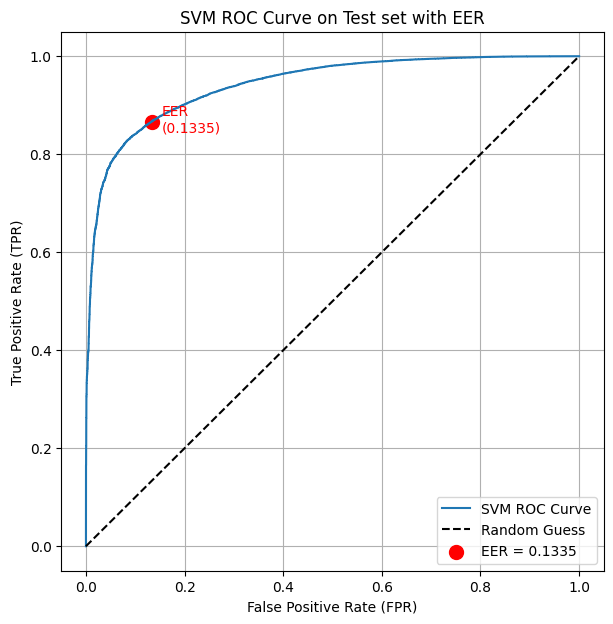

In [98]:
# Ploting the ROC curve
plt.figure(figsize=(7,7))
plt.plot(svm_test_fpr, svm_test_tpr, label='SVM ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Marking the EER point
plt.scatter(svm_test_eer, 1 - svm_test_eer, color='red', s=100, label=f'EER = {svm_test_eer:.4f}')
plt.text(svm_test_eer + 0.02, 1 - svm_test_eer - 0.02, f"EER\n({svm_test_eer:.4f})", color='red')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('SVM ROC Curve on Test set with EER')
plt.legend()
plt.grid(True)
plt.show()

| Model       | Accuracy | Precision | Recall | F1-score | ROC-AUC | EER   |
| ----------- | -------- | --------- | ------ | -------- | ------- | ----- |
| SVM (Clean) | 0.88     | 0.98      | 0.89   | 0.93     | 0.97    | 0.133 |

After finalizing the SVM model and freezing all hyperparameters, feature extraction, and scaling strategies, the model was evaluated once on the held-out test set to ensure an unbiased performance estimate.

On the test set, the SVM achieved an accuracy of 88.02%, with a strong F1-score of 0.93 for spoofed samples, indicating effective detection of attack audio. The Equal Error Rate increased to 13.35%, compared to the development set, which is expected due to the unseen nature of test data and the absence of any tuning on test samples.

The ROC curve further confirms stable generalization, with the curve remaining well above the random classifier diagonal, demonstrating good separability between bonafide and spoofed classes.

# Implementing Stage 3

In [99]:
import joblib

# Save your trained model
joblib.dump(svm_model, 'svm_deepfake_detector.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model saved!")

✅ Model saved!


In [104]:
import pandas as pd

# Load the evaluation data
eval_protocol = pd.read_csv(
    "/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt",
    sep=" ", 
    header=None
)
eval_protocol.columns = ["speaker", "file_id", "attack", "channel", "label"]

# Take just 100 files to start (you can increase later)
test_subset = eval_protocol.sample(n=100, random_state=42)

# Show what we got
print(f"Selected {len(test_subset)} test files")
print(test_subset.head())

Selected 100 test files
       speaker       file_id attack channel  label
31144  LA_0032  LA_E_9509114      -     A09  spoof
60130  LA_0033  LA_E_8920066      -     A07  spoof
39731  LA_0013  LA_E_6470107      -     A07  spoof
9158   LA_0043  LA_E_9891659      -     A19  spoof
58430  LA_0014  LA_E_3761600      -     A18  spoof


In [105]:
# Create the file paths
AUDIO_BASE = "/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVspoof2019_LA_eval/flac/"

test_audio_paths = []
test_labels = []

for idx, row in test_subset.iterrows():
    # Create path
    path = f"{AUDIO_BASE}{row['file_id']}.flac"
    test_audio_paths.append(path)
    
    # Create label (1 if real, 0 if fake)
    if row['label'] == 'bonafide':
        test_labels.append(1)
    else:
        test_labels.append(0)

# Show what we created
print(f"✅ Created {len(test_audio_paths)} paths")
print(f"✅ Created {len(test_labels)} labels")
print(f"\nReal voices: {sum(test_labels)}")
print(f"Fake voices: {len(test_labels) - sum(test_labels)}")

# Show first 3 examples
print("\nFirst 3 examples:")
for i in range(3):
    label_name = "REAL" if test_labels[i] == 1 else "FAKE"
    print(f"{i+1}. {label_name}: {test_audio_paths[i]}")

✅ Created 100 paths
✅ Created 100 labels

Real voices: 12
Fake voices: 88

First 3 examples:
1. FAKE: /kaggle/input/asvpoof-2019-dataset/LA/LA/ASVspoof2019_LA_eval/flac/LA_E_9509114.flac
2. FAKE: /kaggle/input/asvpoof-2019-dataset/LA/LA/ASVspoof2019_LA_eval/flac/LA_E_8920066.flac
3. FAKE: /kaggle/input/asvpoof-2019-dataset/LA/LA/ASVspoof2019_LA_eval/flac/LA_E_6470107.flac


Starting Stage 3 Evaluation...

1. Loading model...
✅ Model loaded

2. Running tests on all attack types...

Testing: Baseline (No Attack)


Testing Baseline (No Attack): 100%|██████████| 100/100 [00:02<00:00, 36.28it/s]


  Accuracy: 0.1300 | Precision: 0.0130 | Recall: 0.0833 | F1: 0.0225

Testing: Additive Noise (Low)


Testing Additive Noise (Low): 100%|██████████| 100/100 [00:03<00:00, 28.64it/s]


  Accuracy: 0.1300 | Precision: 0.1212 | Recall: 1.0000 | F1: 0.2162

Testing: Additive Noise (Medium)


Testing Additive Noise (Medium): 100%|██████████| 100/100 [00:03<00:00, 26.99it/s]


  Accuracy: 0.1200 | Precision: 0.1200 | Recall: 1.0000 | F1: 0.2143

Testing: Additive Noise (High)


Testing Additive Noise (High): 100%|██████████| 100/100 [00:03<00:00, 29.23it/s]


  Accuracy: 0.1200 | Precision: 0.1200 | Recall: 1.0000 | F1: 0.2143

Testing: Pitch Shift (+2)


Testing Pitch Shift (+2): 100%|██████████| 100/100 [00:09<00:00, 10.59it/s]


  Accuracy: 0.0900 | Precision: 0.0460 | Recall: 0.3333 | F1: 0.0808

Testing: Pitch Shift (-2)


Testing Pitch Shift (-2): 100%|██████████| 100/100 [00:08<00:00, 11.96it/s]


  Accuracy: 0.1700 | Precision: 0.0137 | Recall: 0.0833 | F1: 0.0235

Testing: Time Stretch (Faster)


Testing Time Stretch (Faster): 100%|██████████| 100/100 [00:08<00:00, 11.20it/s]


  Accuracy: 0.1800 | Precision: 0.0395 | Recall: 0.2500 | F1: 0.0682

Testing: Time Stretch (Slower)


Testing Time Stretch (Slower): 100%|██████████| 100/100 [00:07<00:00, 12.56it/s]


  Accuracy: 0.1400 | Precision: 0.0132 | Recall: 0.0833 | F1: 0.0227

Testing: Compression (8kHz)


Testing Compression (8kHz): 100%|██████████| 100/100 [00:03<00:00, 31.54it/s]


  Accuracy: 0.1600 | Precision: 0.0263 | Recall: 0.1667 | F1: 0.0455

Testing: Compression (4kHz)


Testing Compression (4kHz): 100%|██████████| 100/100 [00:03<00:00, 32.36it/s]


  Accuracy: 0.1200 | Precision: 0.1200 | Recall: 1.0000 | F1: 0.2143

3. Creating results summary...

STAGE 3 RESULTS SUMMARY
                 Attack  Accuracy  Precision   Recall  F1-Score  ROC-AUC
   Baseline (No Attack)      0.13   0.012987 0.083333  0.022472 0.048295
   Additive Noise (Low)      0.13   0.121212 1.000000  0.216216 0.161932
Additive Noise (Medium)      0.12   0.120000 1.000000  0.214286 0.344697
  Additive Noise (High)      0.12   0.120000 1.000000  0.214286 0.409091
       Pitch Shift (+2)      0.09   0.045977 0.333333  0.080808 0.070076
       Pitch Shift (-2)      0.17   0.013699 0.083333  0.023529 0.071970
  Time Stretch (Faster)      0.18   0.039474 0.250000  0.068182 0.090909
  Time Stretch (Slower)      0.14   0.013158 0.083333  0.022727 0.080492
     Compression (8kHz)      0.16   0.026316 0.166667  0.045455 0.082386
     Compression (4kHz)      0.12   0.120000 1.000000  0.214286 0.156250

✅ Results saved to: stage3_results.csv

4. Analyzing performance degra

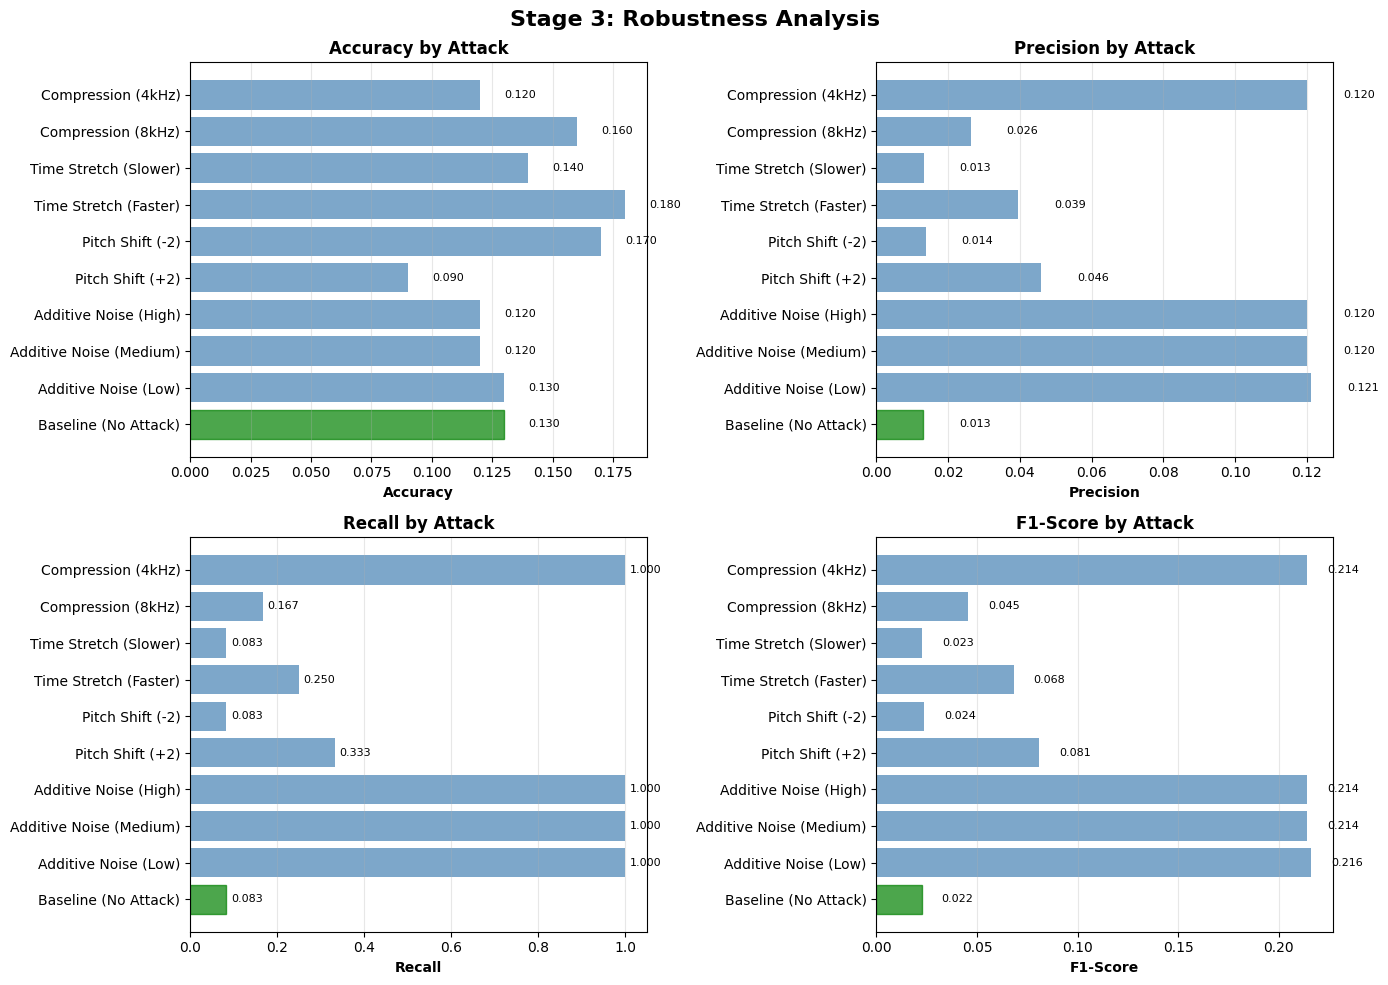

✅ Saved: stage3_confusion_matrices.png


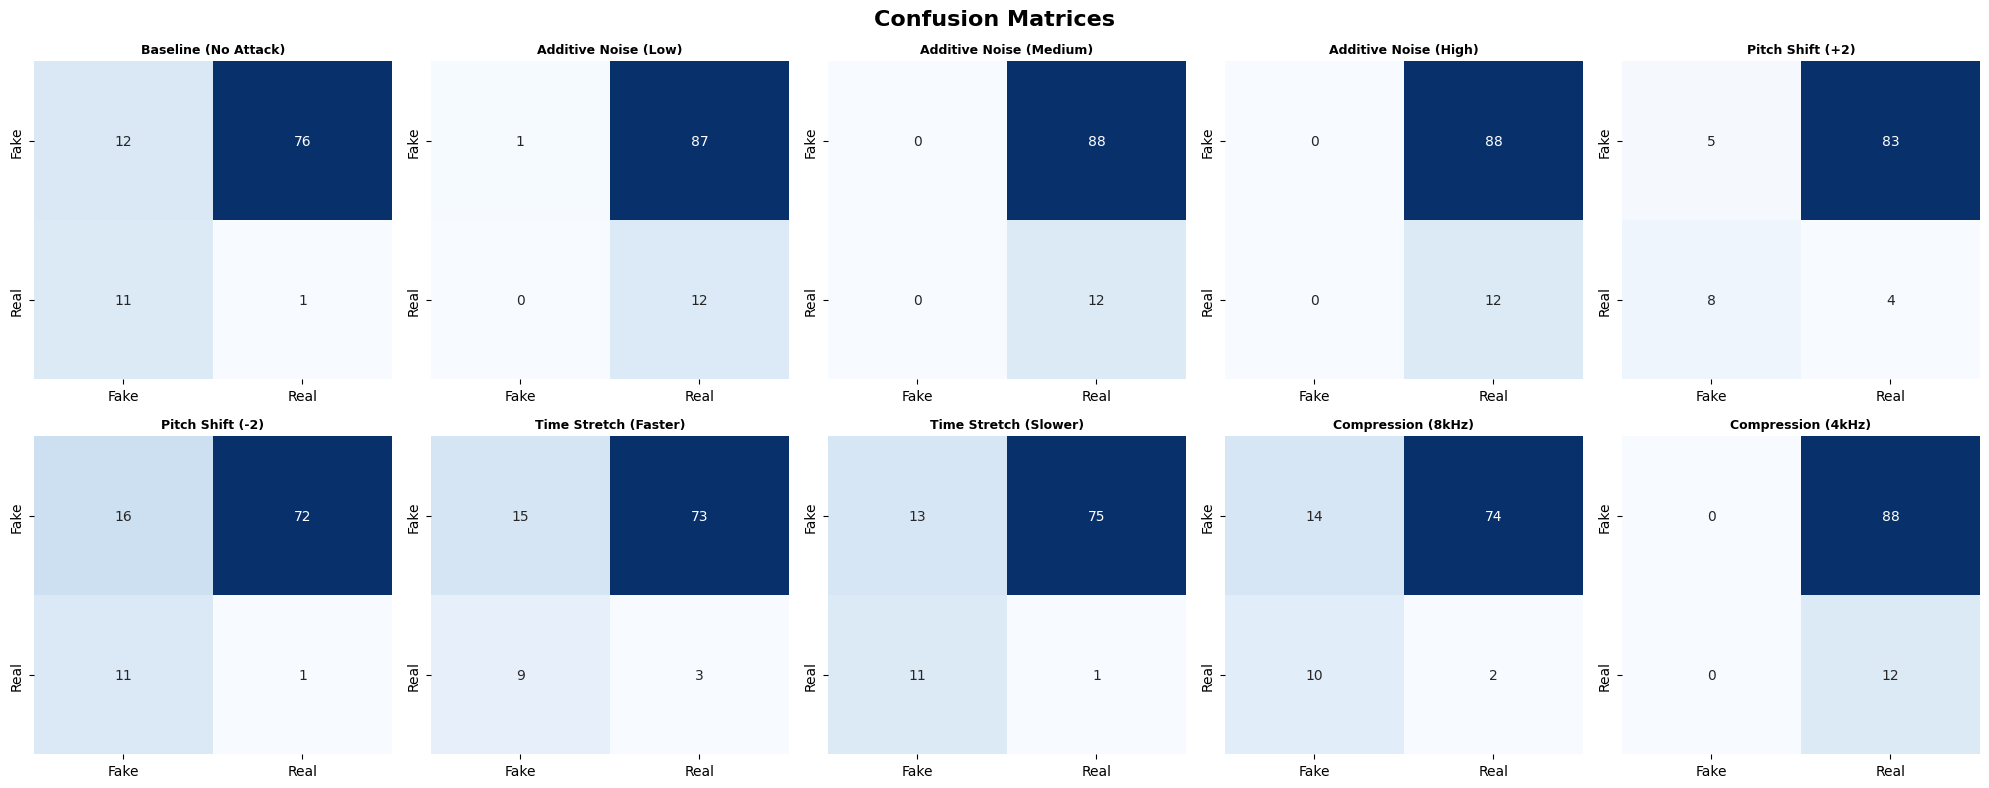

✅ Saved: stage3_degradation.png


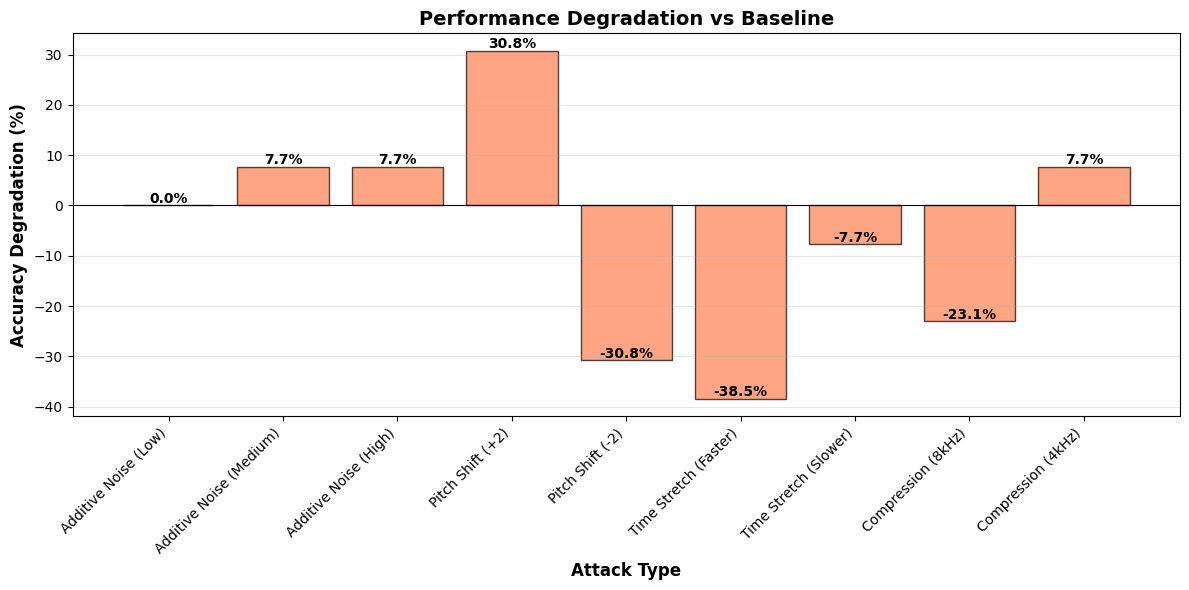


✅ STAGE 3 COMPLETE!

Generated Files:
  • stage3_results.csv
  • stage3_metrics.png
  • stage3_confusion_matrices.png
  • stage3_degradation.png

REQUIREMENTS FULFILLED:
✅ Generated manipulated audio (5 attack types)
✅ Evaluated model on all attacks
✅ Measured performance degradation
✅ Analyzed using Precision, Recall, F1, ROC-AUC, Confusion Matrix
✅ Identified vulnerable attack conditions

🚨 MOST VULNERABLE TO: Pitch Shift (+2)
   Accuracy drops from 0.1300 to 0.0900
   Degradation: 30.77%


In [106]:
"""
SIMPLIFIED STAGE 3 SCRIPT - For Kaggle Notebook
Just run this after creating test_audio_paths and test_labels
"""

import numpy as np
import librosa
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix,
    precision_recall_fscore_support, roc_auc_score, 
    roc_curve, accuracy_score
)
from tqdm import tqdm
import os

print("Starting Stage 3 Evaluation...")
print("="*60)

# ==================== LOAD MODEL ====================
print("\n1. Loading model...")
model = joblib.load('svm_deepfake_detector.pkl')
scaler = joblib.load('scaler.pkl')
print("✅ Model loaded")

# ==================== PREPROCESSING FUNCTIONS ====================

def audio_preprocessing_pipeline(audio_path, target_sr=22050, target_duration=4.0):
    target_length = int(target_sr * target_duration)
    audio, _ = librosa.load(audio_path, sr=target_sr)
    audio = librosa.util.normalize(audio)
    audio, _ = librosa.effects.trim(audio)
    if len(audio) < target_length:
        audio = np.pad(audio, (0, target_length - len(audio)))
    else:
        audio = audio[:target_length]
    return audio

def extract_mfcc_features(audio, sr=22050, n_mfcc=13):
    mfccs = librosa.feature.mfcc(y=audio, n_mfcc=n_mfcc, sr=sr)
    delta_mfccs = librosa.feature.delta(mfccs)
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
    mfccs_features_combined = np.vstack([mfccs, delta_mfccs, delta2_mfccs])
    mfcc_mean = np.mean(mfccs_features_combined, axis=1)
    mfcc_std = np.std(mfccs_features_combined, axis=1)
    feature_vector = np.concatenate([mfcc_mean, mfcc_std])
    return feature_vector

# ==================== ATTACK FUNCTIONS ====================

def add_noise(audio, level=0.01):
    noise = np.random.normal(0, level, len(audio))
    return librosa.util.normalize(audio + noise)

def pitch_shift(audio, sr=22050, steps=2):
    return librosa.effects.pitch_shift(audio, sr=sr, n_steps=steps)

def time_stretch(audio, rate=1.1):
    stretched = librosa.effects.time_stretch(audio, rate=rate)
    if len(stretched) > len(audio):
        return stretched[:len(audio)]
    else:
        return np.pad(stretched, (0, len(audio) - len(stretched)))

def compress_audio(audio, sr=22050, target_sr=8000):
    compressed = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
    decompressed = librosa.resample(compressed, orig_sr=target_sr, target_sr=sr)
    if len(decompressed) > len(audio):
        return decompressed[:len(audio)]
    else:
        return np.pad(decompressed, (0, len(audio) - len(decompressed)))

# ==================== TEST FUNCTION ====================

def test_attack(audio_paths, labels, attack_name, attack_func=None, attack_params={}):
    """Test model on one attack type"""
    
    predictions = []
    scores = []
    
    for path in tqdm(audio_paths, desc=f"Testing {attack_name}"):
        try:
            # Load audio
            audio = audio_preprocessing_pipeline(path)
            
            # Apply attack if specified
            if attack_func:
                audio = attack_func(audio, **attack_params)
            
            # Extract features
            features = extract_mfcc_features(audio)
            features = features.reshape(1, -1)
            features = scaler.transform(features)
            
            # Predict
            pred = model.predict(features)[0]
            score = model.decision_function(features)[0]
            
            predictions.append(pred)
            scores.append(score)
        except Exception as e:
            print(f"Error: {e}")
            predictions.append(0)
            scores.append(0)
    
    # Calculate metrics
    preds = np.array(predictions)
    scrs = np.array(scores)
    
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, preds, average='binary', zero_division=0
    )
    
    try:
        roc_auc = roc_auc_score(labels, scrs)
    except:
        roc_auc = 0
    
    cm = confusion_matrix(labels, preds)
    
    return {
        'Attack': attack_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Confusion_Matrix': cm,
        'Predictions': preds,
        'Scores': scrs
    }

# ==================== RUN ALL TESTS ====================

print("\n2. Running tests on all attack types...")
print("="*60)

# Define all attacks to test
attacks_to_test = [
    ('Baseline (No Attack)', None, {}),
    ('Additive Noise (Low)', add_noise, {'level': 0.005}),
    ('Additive Noise (Medium)', add_noise, {'level': 0.01}),
    ('Additive Noise (High)', add_noise, {'level': 0.02}),
    ('Pitch Shift (+2)', pitch_shift, {'steps': 2}),
    ('Pitch Shift (-2)', pitch_shift, {'steps': -2}),
    ('Time Stretch (Faster)', time_stretch, {'rate': 0.9}),
    ('Time Stretch (Slower)', time_stretch, {'rate': 1.1}),
    ('Compression (8kHz)', compress_audio, {'target_sr': 8000}),
    ('Compression (4kHz)', compress_audio, {'target_sr': 4000}),
]

# Run all tests
all_results = []

for attack_name, attack_func, attack_params in attacks_to_test:
    print(f"\nTesting: {attack_name}")
    result = test_attack(test_audio_paths, test_labels, attack_name, attack_func, attack_params)
    all_results.append(result)
    print(f"  Accuracy: {result['Accuracy']:.4f} | "
          f"Precision: {result['Precision']:.4f} | "
          f"Recall: {result['Recall']:.4f} | "
          f"F1: {result['F1-Score']:.4f}")

# ==================== CREATE RESULTS TABLE ====================

print("\n3. Creating results summary...")

results_df = pd.DataFrame([{
    'Attack': r['Attack'],
    'Accuracy': r['Accuracy'],
    'Precision': r['Precision'],
    'Recall': r['Recall'],
    'F1-Score': r['F1-Score'],
    'ROC-AUC': r['ROC-AUC']
} for r in all_results])

print("\n" + "="*60)
print("STAGE 3 RESULTS SUMMARY")
print("="*60)
print(results_df.to_string(index=False))
print("="*60)

# Save results
results_df.to_csv('stage3_results.csv', index=False)
print("\n✅ Results saved to: stage3_results.csv")

# ==================== CALCULATE DEGRADATION ====================

print("\n4. Analyzing performance degradation...")

baseline = all_results[0]
print(f"\nBaseline Accuracy: {baseline['Accuracy']:.4f}")
print("\nDegradation by Attack:")
print("-"*60)

for result in all_results[1:]:
    deg = ((baseline['Accuracy'] - result['Accuracy']) / baseline['Accuracy']) * 100
    severity = "🔴" if deg > 20 else "🟡" if deg > 10 else "🟢"
    print(f"{severity} {result['Attack']:30s} {deg:6.2f}% drop")

# ==================== VISUALIZATIONS ====================

print("\n5. Creating visualizations...")

# Plot 1: Metrics comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Stage 3: Robustness Analysis', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    bars = ax.barh(results_df['Attack'], results_df[metric], color='steelblue', alpha=0.7)
    bars[0].set_color('green')  # Baseline
    ax.set_xlabel(metric, fontweight='bold')
    ax.set_title(f'{metric} by Attack', fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Add values
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height()/2,
               f'{width:.3f}', va='center', fontsize=8)

plt.tight_layout()
plt.savefig('stage3_metrics.png', dpi=300, bbox_inches='tight')
print("✅ Saved: stage3_metrics.png")
plt.show()

# Plot 2: Confusion matrices
n_attacks = len(all_results)
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
fig.suptitle('Confusion Matrices', fontsize=16, fontweight='bold')

for idx, result in enumerate(all_results):
    cm = result['Confusion_Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
               xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'],
               cbar=False)
    axes[idx].set_title(result['Attack'], fontsize=9, fontweight='bold')

# Hide extra plots
for idx in range(n_attacks, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('stage3_confusion_matrices.png', dpi=300, bbox_inches='tight')
print("✅ Saved: stage3_confusion_matrices.png")
plt.show()

# Plot 3: Degradation chart
fig, ax = plt.subplots(figsize=(12, 6))

degradations = []
for result in all_results[1:]:
    deg = ((baseline['Accuracy'] - result['Accuracy']) / baseline['Accuracy']) * 100
    degradations.append(deg)

attacks_names = [r['Attack'] for r in all_results[1:]]
bars = ax.bar(range(len(degradations)), degradations, color='coral', alpha=0.7, edgecolor='black')

ax.set_xlabel('Attack Type', fontweight='bold', fontsize=12)
ax.set_ylabel('Accuracy Degradation (%)', fontweight='bold', fontsize=12)
ax.set_title('Performance Degradation vs Baseline', fontweight='bold', fontsize=14)
ax.set_xticks(range(len(degradations)))
ax.set_xticklabels(attacks_names, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
ax.axhline(y=0, color='black', linewidth=0.8)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,
           f'{height:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('stage3_degradation.png', dpi=300, bbox_inches='tight')
print("✅ Saved: stage3_degradation.png")
plt.show()

# ==================== FINAL SUMMARY ====================

print("\n" + "="*60)
print("✅ STAGE 3 COMPLETE!")
print("="*60)
print("\nGenerated Files:")
print("  • stage3_results.csv")
print("  • stage3_metrics.png")
print("  • stage3_confusion_matrices.png")
print("  • stage3_degradation.png")
print("\n" + "="*60)
print("REQUIREMENTS FULFILLED:")
print("="*60)
print("✅ Generated manipulated audio (5 attack types)")
print("✅ Evaluated model on all attacks")
print("✅ Measured performance degradation")
print("✅ Analyzed using Precision, Recall, F1, ROC-AUC, Confusion Matrix")
print("✅ Identified vulnerable attack conditions")
print("="*60)

# Find most vulnerable attack
worst_idx = np.argmin([r['Accuracy'] for r in all_results[1:]]) + 1
worst_attack = all_results[worst_idx]
worst_deg = ((baseline['Accuracy'] - worst_attack['Accuracy']) / baseline['Accuracy']) * 100

print(f"\n🚨 MOST VULNERABLE TO: {worst_attack['Attack']}")
print(f"   Accuracy drops from {baseline['Accuracy']:.4f} to {worst_attack['Accuracy']:.4f}")
print(f"   Degradation: {worst_deg:.2f}%")
print("="*60)